# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [6]:
df = pd.read_csv('data/nndb_flat.csv', index_col=0)
df.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [14]:
df.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,0.872329,50.306104,3.411560,0.237248,0.209857,73.411348,0.172181,2.696771,32.745301,0.504439,155.986308,12.614945,1.970216,0.104410,0.155511,0.510525,0.088060,0.058155,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,3.849028,186.560653,4.834572,0.449880,0.518369,201.363662,0.553052,5.726967,56.068454,6.383438,203.093234,28.292347,3.358213,0.865958,0.281538,1.799659,0.639808,0.256602,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,0.000000,0.000000,0.382000,0.046000,0.030000,9.000000,0.030000,0.530000,10.000000,0.000000,37.000000,0.100000,0.230000,0.000000,0.020147,0.000000,0.000000,0.000000,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,0.110000,7.000000,2.100000,0.150000,0.077500,19.000000,0.079000,1.330000,20.000000,0.022000,133.000000,3.900000,0.845000,0.001667,0.070588,0.033333,0.000000,0.007333,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,0.450000,25.000000,5.029250,0.260000,0.223000,62.000000,0.144750,2.580000,29.000000,0.222000,216.000000,21.300000,2.700000,0.023333,0.208824,0.540625,0.027778,0.030000,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,149.400000,5881.000000,127.500000,17.500000,23.375000,7364.000000,15.050000,123.600000,781.000000,328.000000,9918.000000,1917.000000,90.950000,33.333333,7.058824,41.204167,26.666667,9.960000,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


<Axes: >

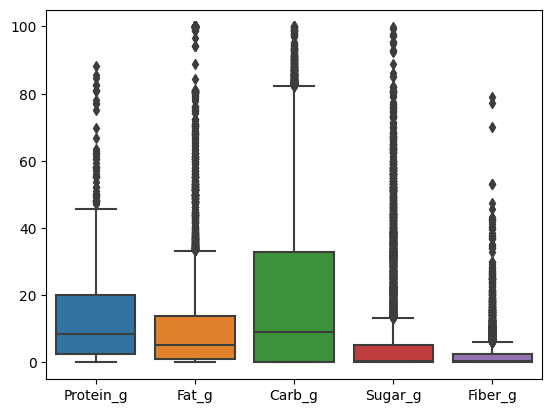

In [23]:
sns.boxplot(df[df.columns[7:12]])

<Axes: >

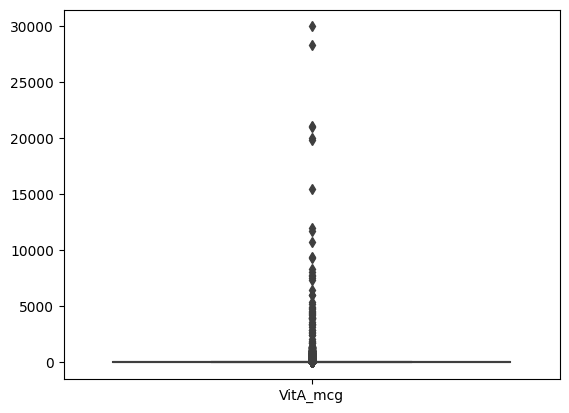

In [26]:
sns.boxplot(df[['VitA_mcg']])

<Axes: >

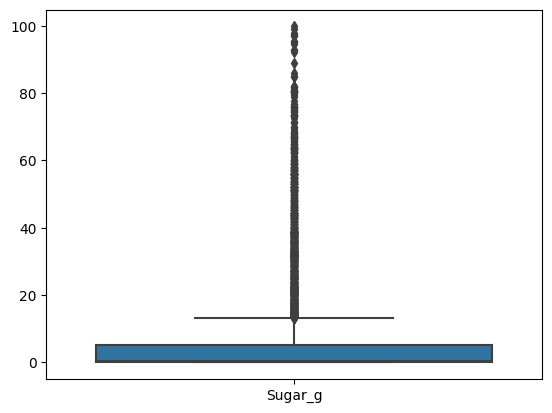

In [27]:
sns.boxplot(df[['Sugar_g']])

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_10124\2729291450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

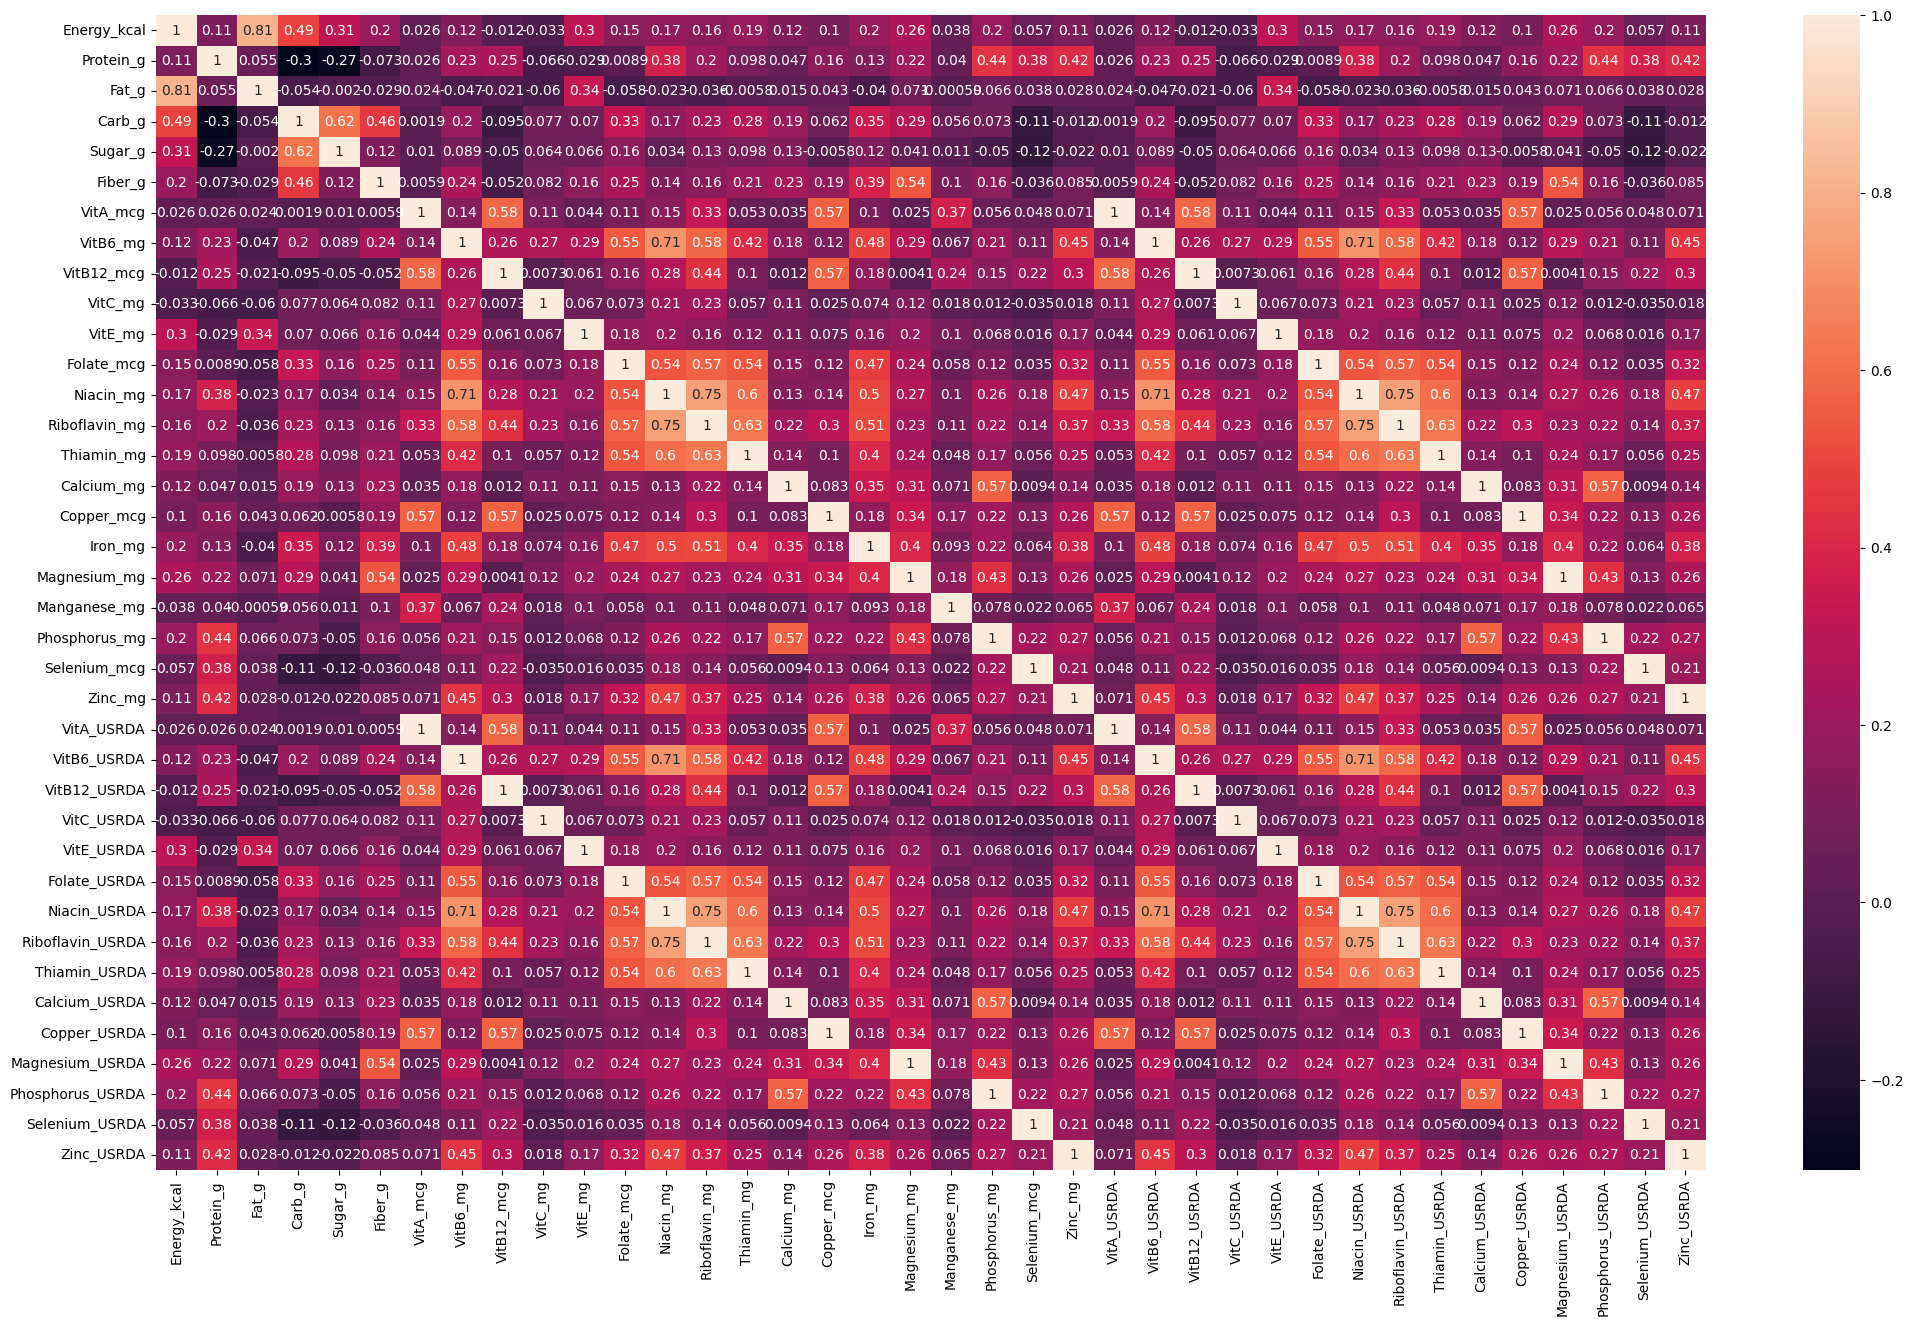

In [28]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)

In [29]:
df.columns[df.columns.str.contains("USRDA")]

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [30]:
df.drop(columns=df.columns[df.columns.str.contains("USRDA")], inplace=True)
df

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19


### Variables no numéricas
Elimina las variables de texto del dataset

In [32]:
df.dtypes

FoodGroup          object
ShortDescrip       object
Descrip            object
CommonName         object
MfgName            object
ScientificName     object
Energy_kcal       float64
Protein_g         float64
Fat_g             float64
Carb_g            float64
Sugar_g           float64
Fiber_g           float64
VitA_mcg          float64
VitB6_mg          float64
VitB12_mcg        float64
VitC_mg           float64
VitE_mg           float64
Folate_mcg        float64
Niacin_mg         float64
Riboflavin_mg     float64
Thiamin_mg        float64
Calcium_mg        float64
Copper_mcg        float64
Iron_mg           float64
Magnesium_mg      float64
Manganese_mg      float64
Phosphorus_mg     float64
Selenium_mcg      float64
Zinc_mg           float64
dtype: object

In [33]:
df_pca = df.iloc[:, 6:]
df_pca

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

<Axes: >

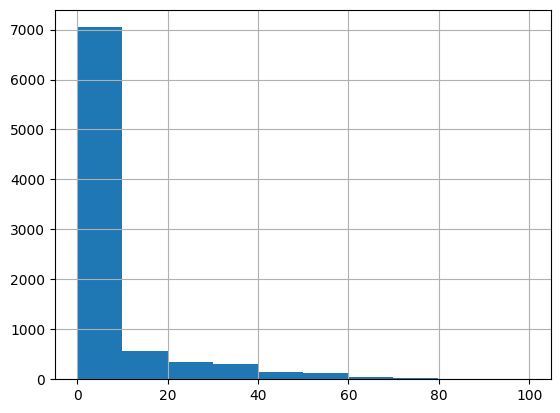

In [34]:
df['Sugar_g'].hist()

In [35]:
df['Sugar_g'].skew()

2.9533244194378163

In [38]:
np.log1p(0)

0.0

In [41]:
for col in df_pca.columns:
    df_pca[col] = np.log1p(df_pca[col])
    # print(col)


<Axes: >

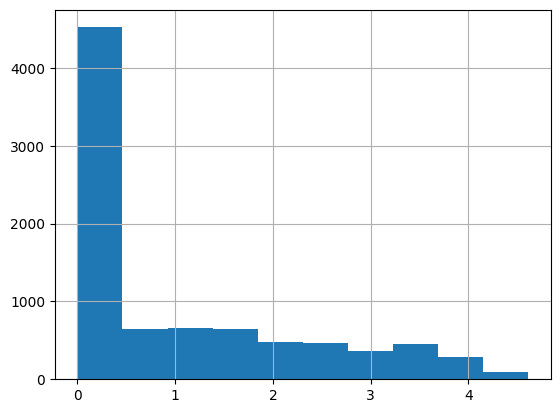

In [43]:
df_pca['Sugar_g'].hist()

In [45]:
df_pca['Sugar_g'].skew()

1.0035969176561736

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [46]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)
df_scaled

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [47]:
df_scaled.shape

(8618, 23)

In [48]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(df_scaled)
X_pca.shape

(8618, 23)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [49]:
pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

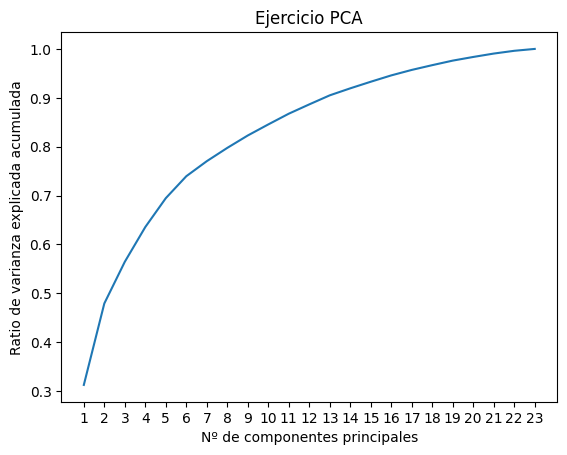

In [54]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio de varianza explicada acumulada")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,24));

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [ ]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(df_scaled)
X_pca6.shape

(8618, 6)

In [79]:
df_pca6 = pd.DataFrame(X_pca6, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca6

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968026,-1.463997,0.270942,4.067066,0.307469
1,-2.106485,-0.909507,-1.480589,0.263279,4.032507,0.348870
2,-3.267830,-1.138435,-2.042341,1.175574,4.071585,1.327103
3,1.525964,-1.264093,0.135995,-0.929763,2.430138,-2.095160
4,1.240712,-1.204123,0.004700,-1.191726,2.691474,-2.341451
...,...,...,...,...,...,...
8613,2.553661,-2.548732,0.472225,-0.109477,2.717721,0.018194
8614,0.075018,-1.840950,0.935759,-1.348744,-0.391168,-0.759885
8615,-2.930530,1.664397,-1.242019,1.172385,-0.915466,-0.885001
8616,1.118895,-0.780828,0.805159,-1.581959,1.641575,1.090391


In [59]:
df_pca6_origin = pd.DataFrame(pca6.components_, columns=df_pca.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_pca6_origin

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,0.080658,0.195834,0.303455,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320254,0.388060,0.109656,0.007441,-0.236848,0.256138,0.124466,0.212485,-0.107132,0.072566,0.160926,0.204121,0.136707,0.124534,0.112674,0.259182,-0.061638,-0.225185,-0.159530
PC3,-0.522272,-0.079018,-0.473905,-0.210888,-0.184192,-0.136186,0.292309,0.159117,0.185987,0.394599,-0.123508,0.215660,0.005226,0.096952,-0.057955,0.093727,0.040054,-0.039003,0.073285,-0.029156,0.016400,0.062511,0.039184
PC4,0.064246,-0.132063,0.032884,0.038045,0.281237,-0.081273,0.086500,0.312416,0.232678,0.153344,0.079091,-0.160842,0.184712,0.352803,0.307100,-0.208692,-0.270582,0.124234,-0.319851,-0.327223,-0.230483,-0.164435,-0.026427
PC5,0.148438,-0.075015,0.335096,-0.094981,0.089641,-0.196294,0.544611,-0.071791,0.078369,0.127929,0.547899,0.079727,-0.158400,-0.046810,-0.220320,0.212879,0.008555,-0.181684,-0.044481,-0.074234,0.010859,0.095477,-0.052004
PC6,-0.056267,-0.130102,0.031760,-0.195600,-0.232787,0.056968,-0.220934,0.151899,0.055456,0.104940,0.459784,-0.012675,0.015415,-0.032608,-0.001224,-0.440522,0.404918,0.041896,-0.096269,0.353636,-0.273696,-0.079103,0.095389


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [61]:
df['FoodGroup'].value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [66]:
df_pca6['FoodGroup'] = df['FoodGroup'].values
df_pca6

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
0,-2.139032,-0.968019,-1.464019,0.270888,4.066973,0.307351,Dairy and Egg Products
1,-2.106485,-0.909503,-1.480608,0.263278,4.032411,0.348662,Dairy and Egg Products
2,-3.267829,-1.138429,-2.042400,1.175433,4.071781,1.327067,Dairy and Egg Products
3,1.525964,-1.264101,0.135988,-0.929805,2.430649,-2.095049,Dairy and Egg Products
4,1.240711,-1.204116,0.004597,-1.192189,2.692055,-2.340905,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,2.553659,-2.548694,0.472155,-0.109720,2.716394,0.019484,Finfish and Shellfish Products
8614,0.075016,-1.840913,0.935598,-1.349301,-0.392158,-0.757806,Finfish and Shellfish Products
8615,-2.930528,1.664404,-1.242191,1.172508,-0.915631,-0.885272,Sweets
8616,1.118896,-0.780831,0.804941,-1.581953,1.641804,1.091400,Finfish and Shellfish Products


In [74]:
df_pca6.groupby("FoodGroup").mean().sort_values('PC1')

,PC1,PC2,PC3,PC4,PC5,PC6
FoodGroup,,,,,,
Fats and Oils,-3.268544,-0.770819,-2.333793,1.045041,2.634301,2.054326
Beverages,-3.259459,0.425890,0.958183,0.545586,-0.455638,0.652297
"Soups, Sauces, and Gravies",-3.173748,0.069457,0.213475,0.150329,-0.328240,0.267590
Fruits and Fruit Juices,-2.923483,1.615721,0.915598,0.186589,-0.139237,0.102687
Sweets,-1.902101,1.265913,-1.209133,0.052347,0.329230,-0.555676
Vegetables and Vegetable Products,-1.533553,1.574061,1.800965,-0.500254,-0.045451,0.165313
"Meals, Entrees, and Side Dishes",-0.924840,0.685039,-0.330397,-0.118786,0.039494,-0.506744
Baby Foods,-0.792919,1.260596,0.880854,0.494942,0.929963,-0.278570
American Indian/Alaska Native Foods,-0.758860,-0.756809,-0.145476,0.087401,-0.292529,0.264670
